In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import matplotlib.image as mpimg
import ast
import json
import numpy as np
import shapely.wkt
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib
pd.set_option('display.max_columns', None)
from six.moves import reduce
import scipy
from sklearn.metrics import r2_score
#scipy.stats.pearsonr
import scipy.stats as stats
plt.rcParams.update({'font.family': 'Arial'})
import matplotlib.colors as clr
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from sklearn.cluster import *
from sklearn.decomposition import PCA
from functools import reduce
import scipy.stats

import math
import sklearn
import sklearn.feature_extraction.text
from sklearn import cluster
from sklearn import metrics
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.decomposition
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import roc_auc_score
from shapely import wkt
#from mycolorpy import colorlist as mcp
import matplotlib.ticker as mtick
from  matplotlib.colors import LinearSegmentedColormap
from functools import reduce
import matplotlib.ticker as plticker
from PIL import Image
from scipy.stats import percentileofscore

In [2]:
variables = ['H_Area_of_store', 
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']

In [3]:
vars_definition = {'H_Area_of_store': 'Store area', 
       'R_Percentage_of_Visits_by_brand': 'Chain loyalty', 'J_POI_count_where_store_is': 'POI count',
       'K_POI_diversity_where_store_is': 'POI diversity', 'L_Demographic_similarity': 'Demographic similarity',
       'G_Distance_between_cbg_and_store':'CBG-Store Distance'}

In [4]:
param_2018 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2018/PSO_2018_6params_NYC_norm_28_PSO_15.csv')
table_2018 = pd.read_csv('data/2_data_for_PSO_calibration/table_2018.csv')

param_2019 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2019/PSO_2019_6params_NYC_norm_28_PSO_15.csv')
table_2019 = pd.read_csv('data/2_data_for_PSO_calibration/table_2019.csv')

param_2020 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2020/PSO_2020_6params_NYC_norm_28_PSO_15.csv')
table_2020 = pd.read_csv('data/2_data_for_PSO_calibration/table_2020.csv')

param_2021 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2021/PSO_2021_6params_NYC_norm_28_PSO_15.csv')
table_2021 = pd.read_csv('data/2_data_for_PSO_calibration/table_2021.csv')

dfs_hist = {'param_2018': param_2018,'param_2019': param_2019,'param_2020': param_2020, 'param_2021': param_2021,
      'table_2018': table_2018,'table_2019': table_2019,'table_2020': table_2020, 'table_2021': table_2021}


for k,v in dfs_hist.items():
    v['year']=[int(k.split('_')[-1])]*len(v)
    
params_all = pd.concat([param_2018, param_2019, param_2020, param_2021]).reset_index().drop(columns = 'index')

params_all = params_all[params_all['H_Area_of_store'] != 'no visitors']
params_all[variables] = params_all[variables].astype(float)

In [5]:
clusters = geopandas.read_file(
    'data/4_analysis/census_info_with_kmeans_label.shp')

In [6]:
clusters['CL'].value_counts()

1.0    1423
2.0    1284
3.0    1099
4.0     743
5.0     636
Name: CL, dtype: int64

In [7]:
#conda install pyogrio

In [8]:
useful_cbgs = clusters['cbg'].tolist()
params_all = params_all[params_all['cbg'].isin(useful_cbgs)]

In [9]:
params_all = params_all.merge(clusters[['cbg', 'CL']])
params_all

,cbg,cost,H_Area_of_store,R_Percentage_of_Visits_by_brand,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,G_Distance_between_cbg_and_store,year,CL
0,360050359001,0.032869,5.246015,2.696207,3.122337,9.002946,13.590317,14.482521,2018,2.0
1,360050359001,0.068463,3.006695,1.494385,1.419485,3.797733,4.733461,13.782162,2019,2.0
2,360050359001,0.119249,5.788361,5.957322,4.922220,7.013178,12.599721,13.700481,2020,2.0
3,360050359001,0.837903,13.512518,4.192778,6.233125,3.466252,5.418156,8.299138,2021,2.0
4,360050167001,0.677226,3.484115,6.865978,3.043939,5.076393,5.885937,13.818760,2018,2.0
...,...,...,...,...,...,...,...,...,...,...
20735,360610124002,0.944813,4.089323,6.683310,1.269403,4.336994,7.101265,3.290888,2021,5.0
20736,360610228002,0.470169,1.151588,9.769511,12.402370,10.160422,3.381118,13.904175,2018,3.0
20737,360610228002,0.222091,1.066812,1.594506,6.323780,9.946103,13.704003,10.789332,2019,3.0
20738,360610228002,0.846188,14.592542,14.332341,14.795688,11.045524,11.267600,3.913227,2020,3.0


In [10]:
cluster_definition = {'1': 'senior white people, with lower education level and mediocre income',
                      '2': 'financially limited young people, most are hispanic',
                      '3': 'less educated experienced people, with average income and most are black',
                      '4': 'senior, less educated and common-income people with most race diversity, half are asian',
                      '5': 'senior, most educated and richest people, most are white'}

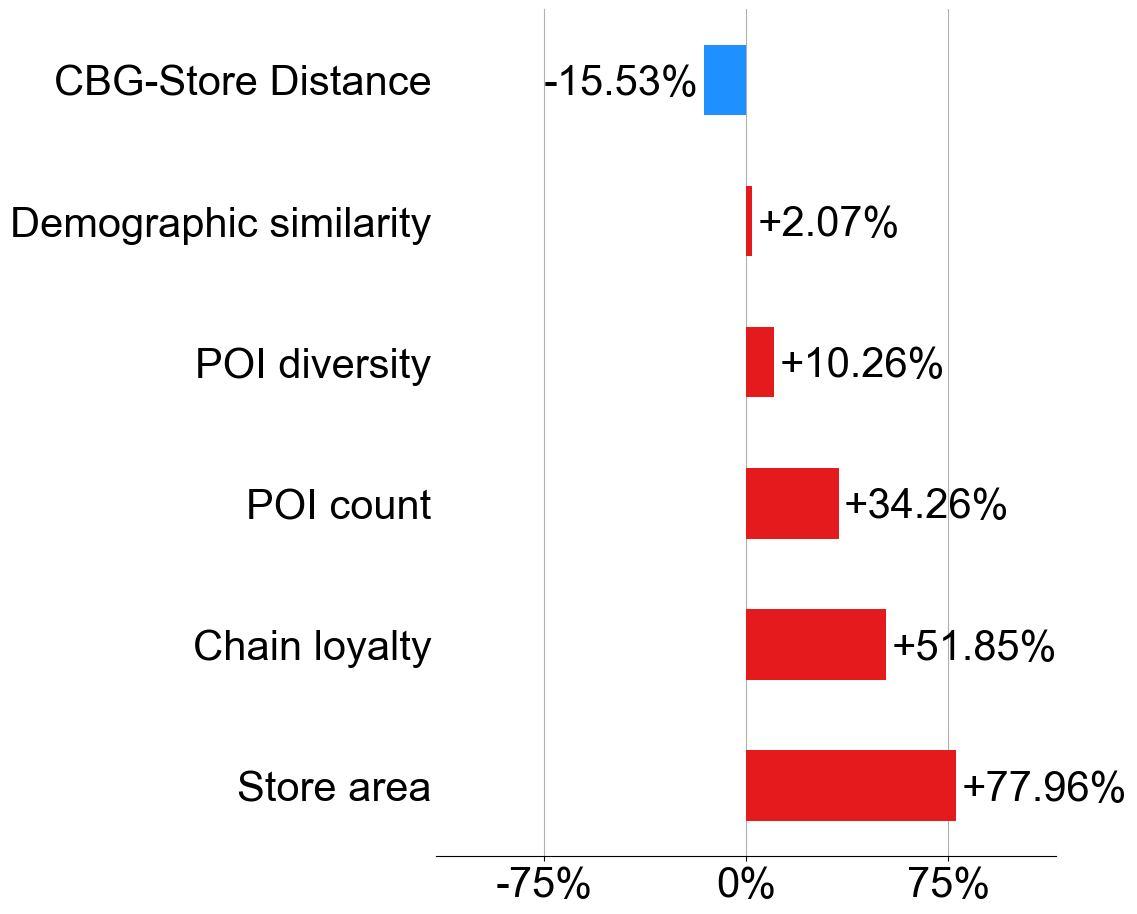

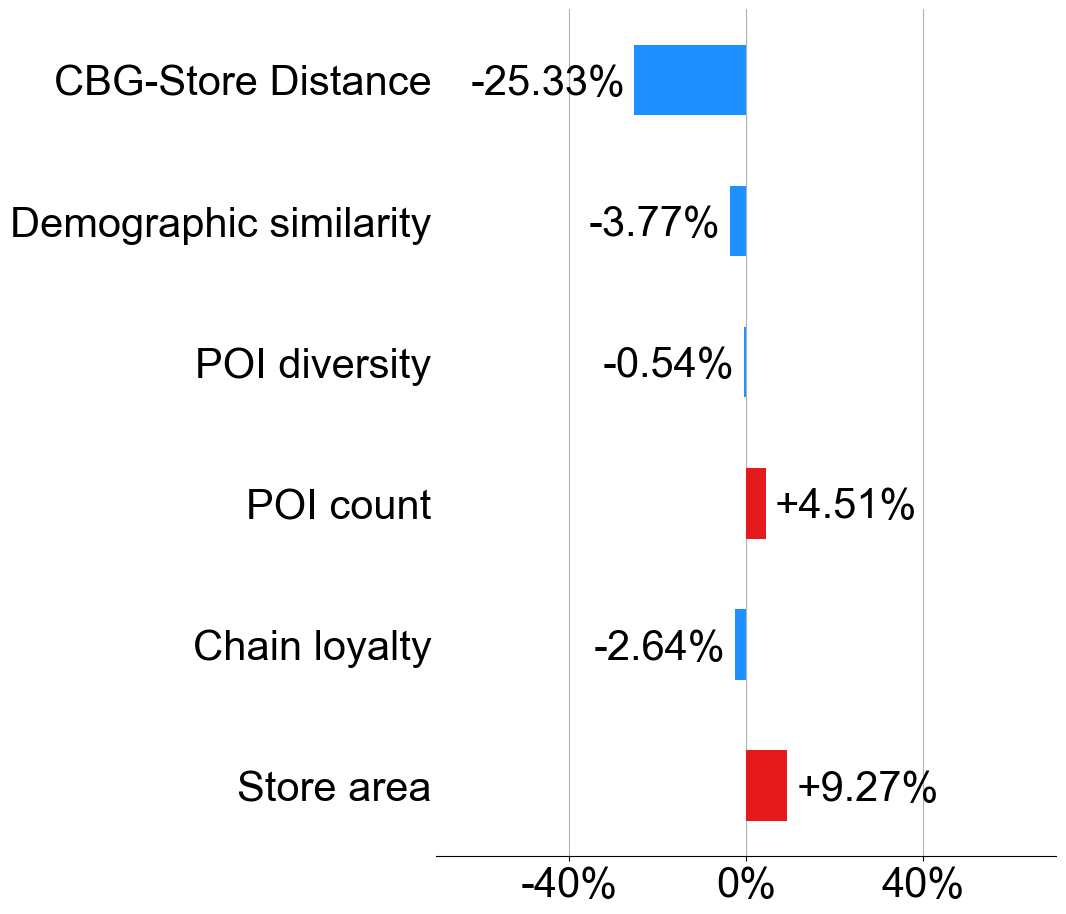

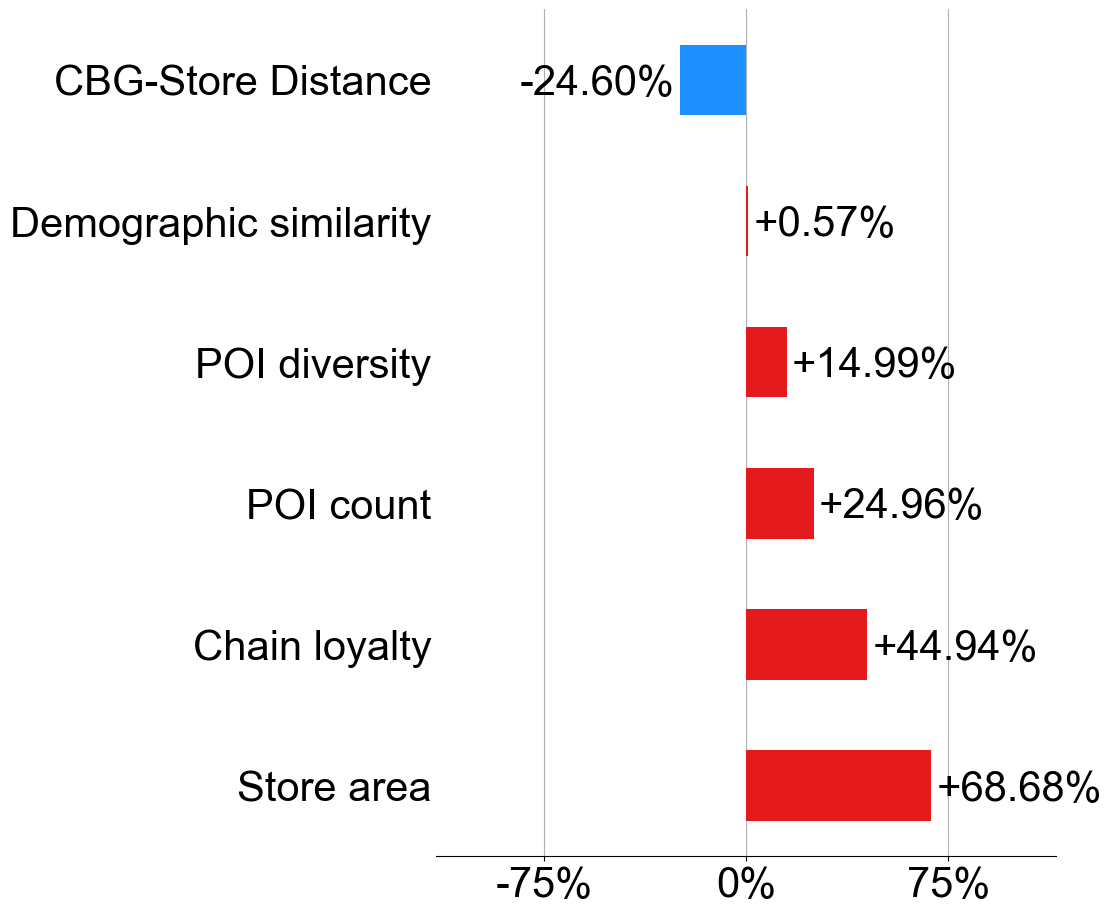

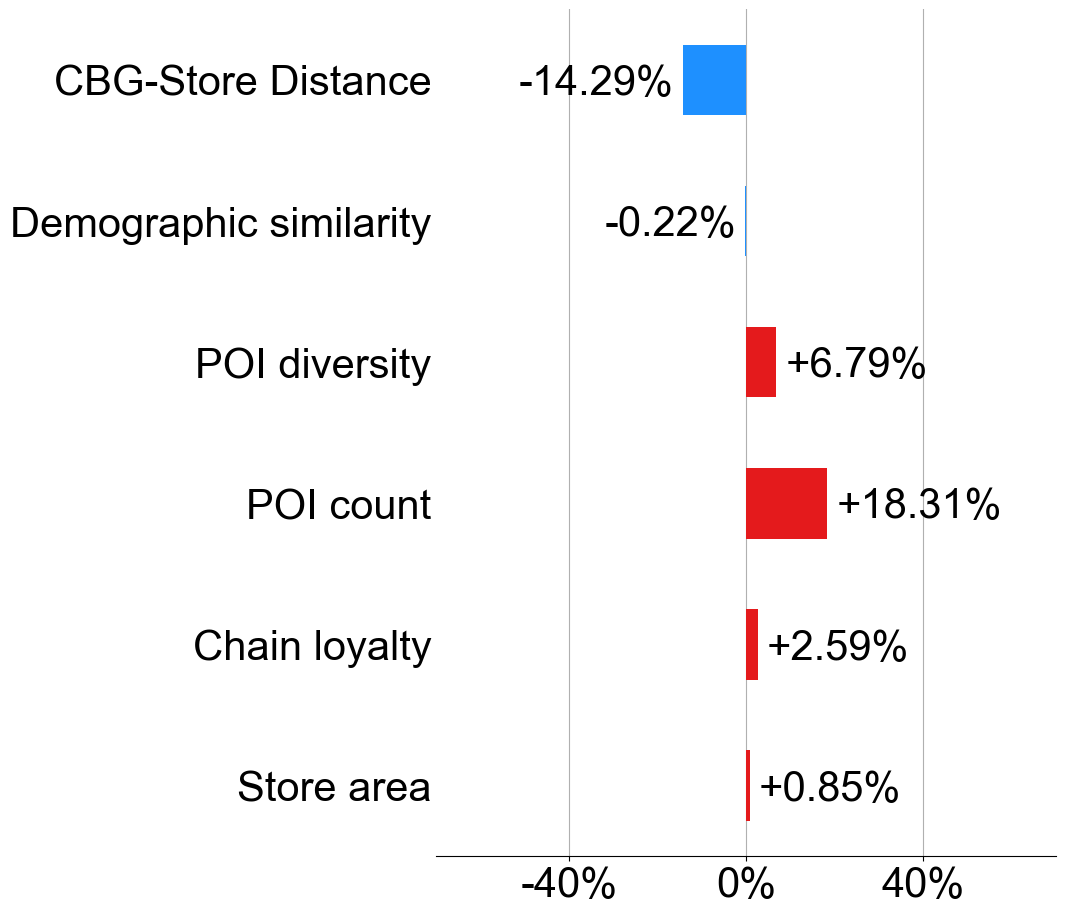

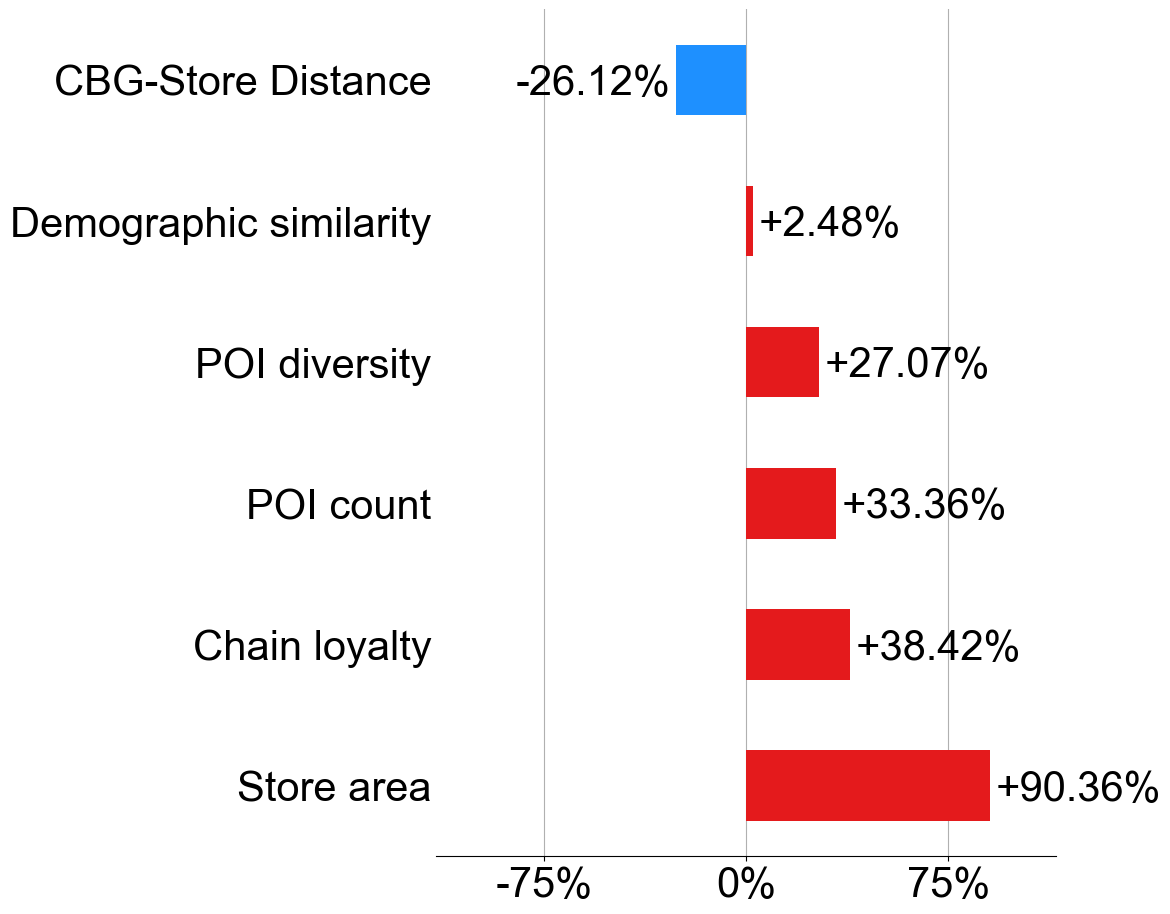

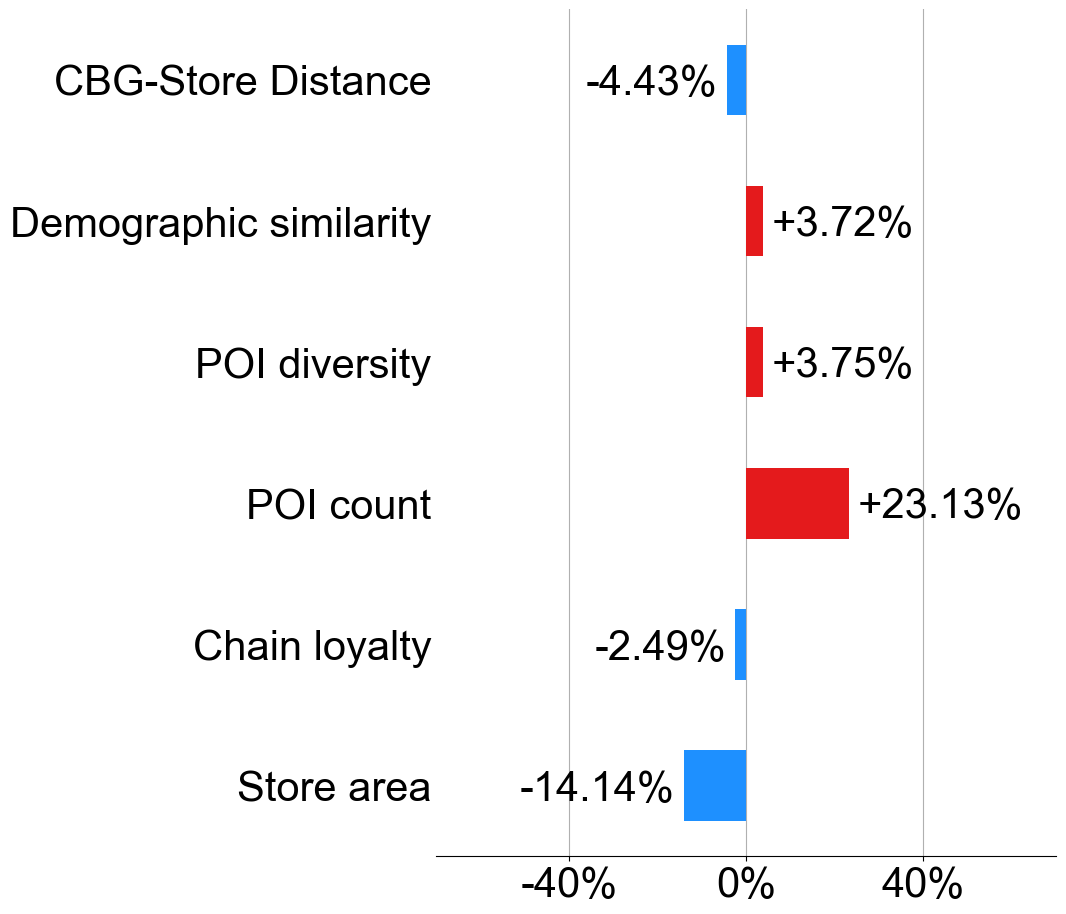

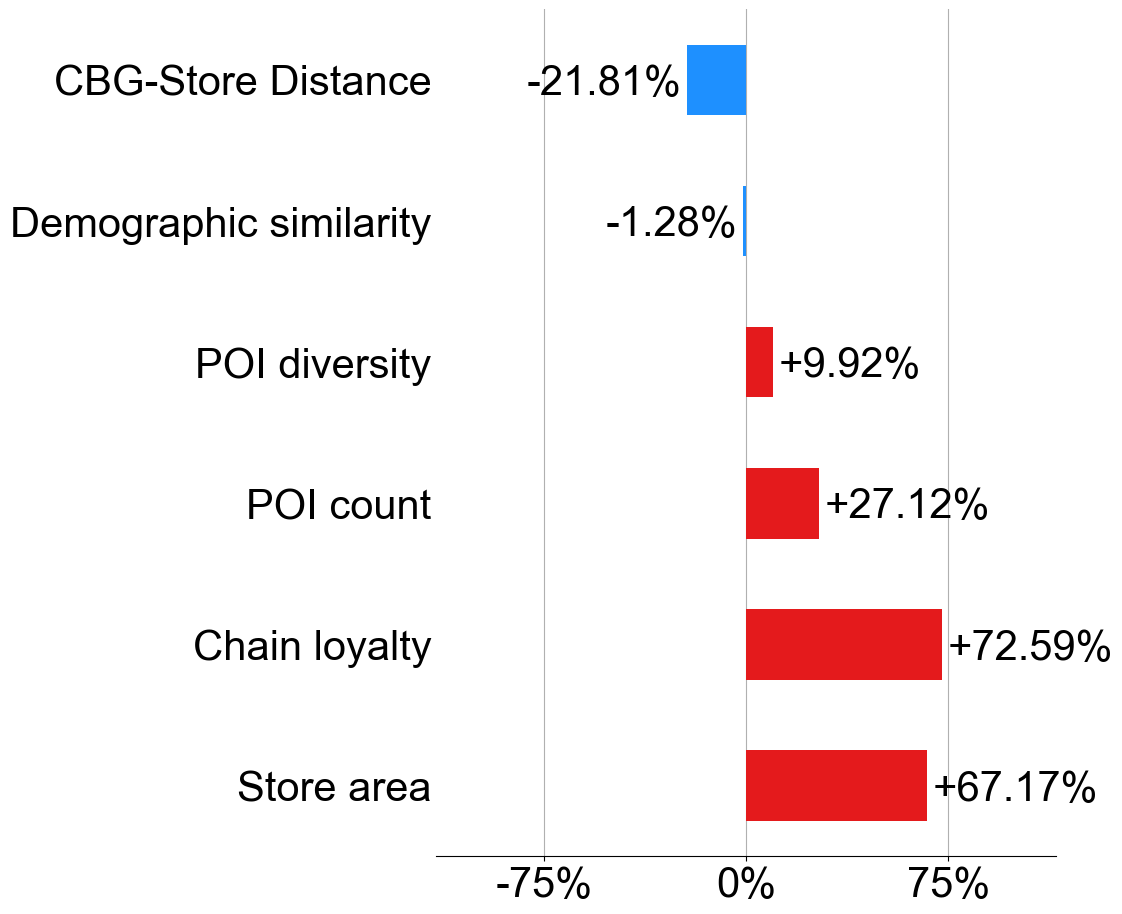

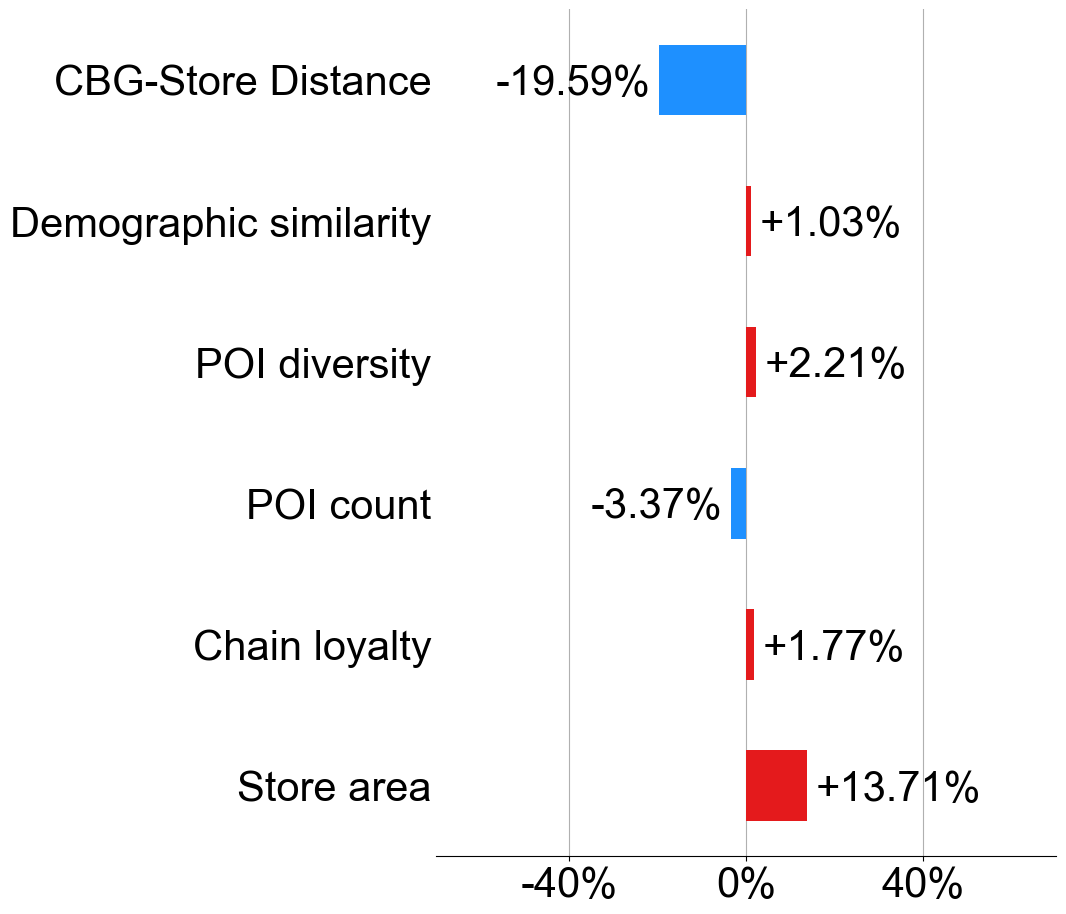

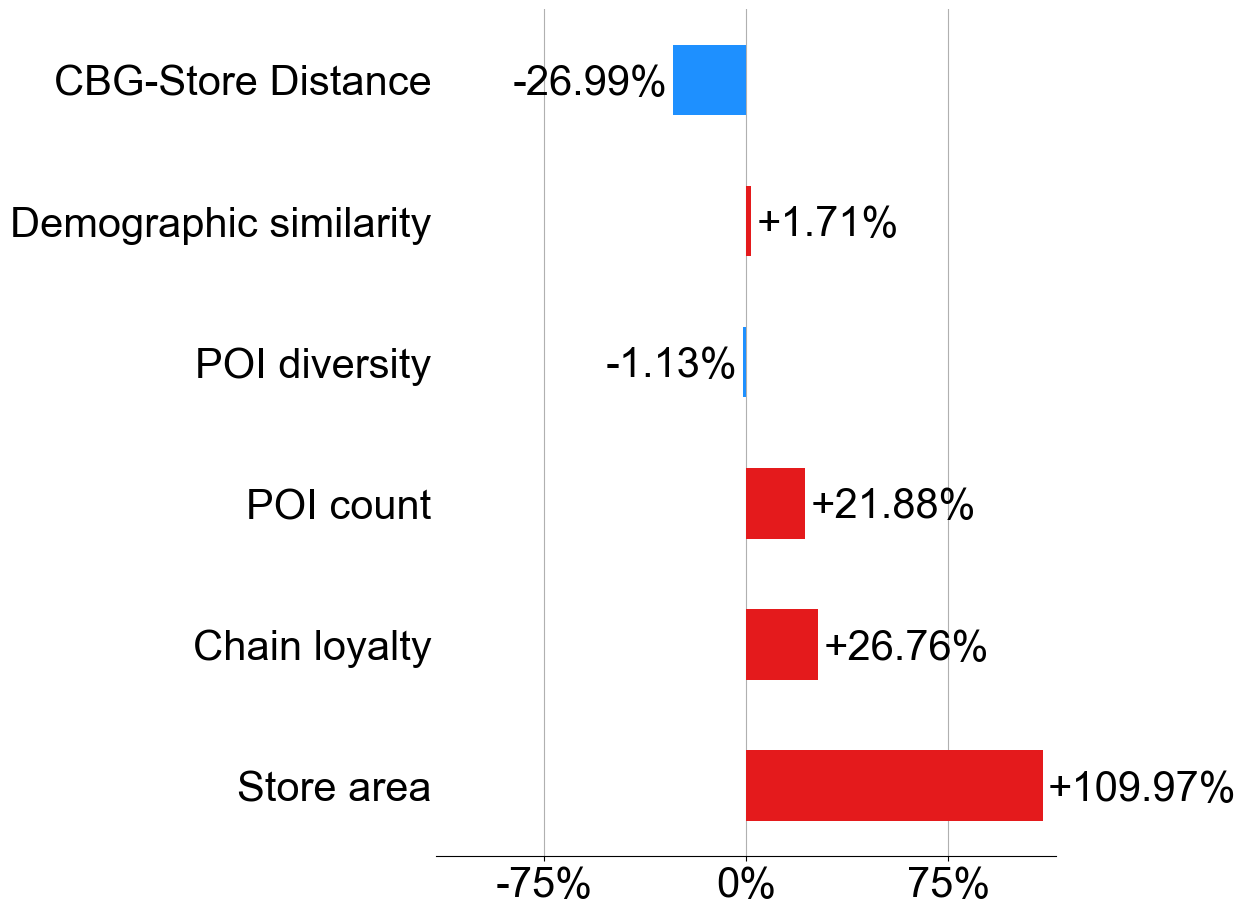

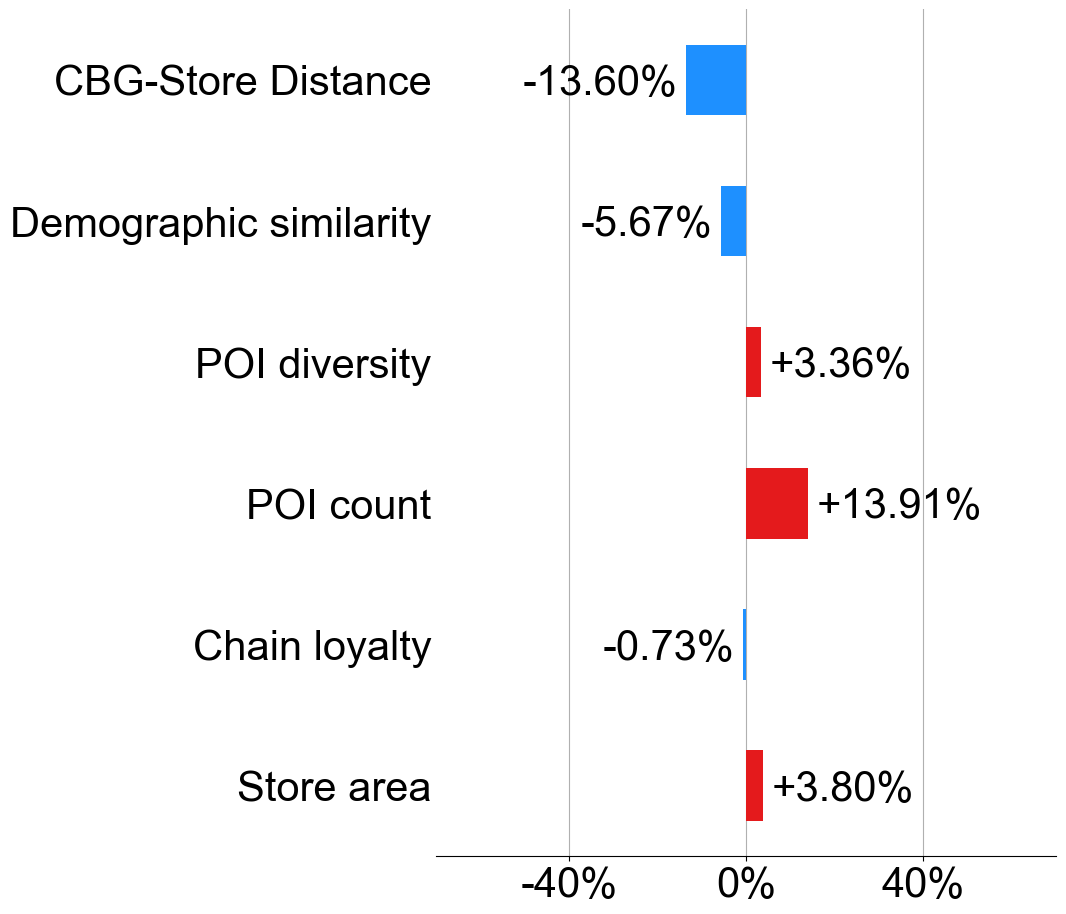

In [12]:
def get_cluster_year_comparision(cluster_label, start_year, end_year):

    d_temp = params_all[params_all['CL'] == cluster_label]
    
    d_here_start = d_temp[d_temp['year'] == start_year][[i for i in variables]].mean().reset_index().rename(
        columns = {'index': 'Variable', 0: 'Mean_start_year'})
    d_here_end = d_temp[d_temp['year'] == end_year][[i for i in variables]].mean().reset_index().rename(
        columns = {'index': 'Variable', 0: 'Mean_end_year'})
    d_here = d_here_start.merge(d_here_end, on = 'Variable')

    d_here['Feature'] = d_here['Variable'].apply(lambda x: vars_definition[x.replace('_delta','')])
    
    d_here['percent'] = (d_here['Mean_end_year'] -  d_here['Mean_start_year'])/d_here['Mean_start_year']
    d_here['positive'] = d_here['percent'] > 0

    ax = d_here.plot.barh(x='Feature', y='percent', color=d_here.positive.map({True: '#e41a1c', False: 'dodgerblue'}), 
                         figsize=(8,11),
                         legend=False,align='center')
    title_here = 'Cluster ' + str(
        cluster_label) + ' Parameter Value Changes from ' + str(start_year) + ' to ' + str(end_year)


    if start_year == 2019 and end_year == 2020:
        axis_upper = 1.15
        axis_lower = -1.15
        loc = plticker.MultipleLocator(base=0.75) 
        ax.xaxis.set_major_locator(loc)
        
    if start_year == 2020 and end_year == 2021:
        axis_upper = 0.7
        axis_lower = -0.7
        loc = plticker.MultipleLocator(base=0.4)
        ax.xaxis.set_major_locator(loc)
    
    for idx, (f, v, p) in d_here[['Feature', 'Variable', 'percent']].iterrows():
        if p >= 0:
            plt.annotate("{:+.2%}".format(p) +'\n', xy=(p+0.02, idx-0.18), ha='left', va='center',size=30)
        else: 
            if start_year == 2019 and end_year == 2020:
                plt.annotate("{:+.2%}".format(p) +'\n', xy=(
                    p-0.02, idx-0.18), ha ='right', va='center', size = 30)
            else:
                plt.annotate("{:+.2%}".format(p) +'\n', xy=(
                    p-0.02, idx-0.18), ha='right', va='center', size = 30)
            
    plt.xticks(rotation = 0, size=30)
    plt.yticks(size=30)

    plt.xlim(axis_lower, axis_upper)
    #ax.set_axis_off()
    plt.ylabel('Feature', size = 30)
    plt.gca().set_xticklabels(['{:.0%}'.format(x) for x in plt.gca().get_xticks()])
    

    plt.grid(axis = 'x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.set_tick_params(length=0)
    plt.ylabel(None)
    
    plt.savefig(str(start_year)+ '_' + str(end_year) + '/Cluster ' + str(
            i) + ' Parameter Value Changes from ' + str(start_year) + ' to ' + str(end_year) + '.jpg', 
                dpi=300, bbox_inches='tight')
    
    plt.show()
for i in range(1,6):
    get_cluster_year_comparision(i, 2019, 2020)
    get_cluster_year_comparision(i, 2020, 2021)

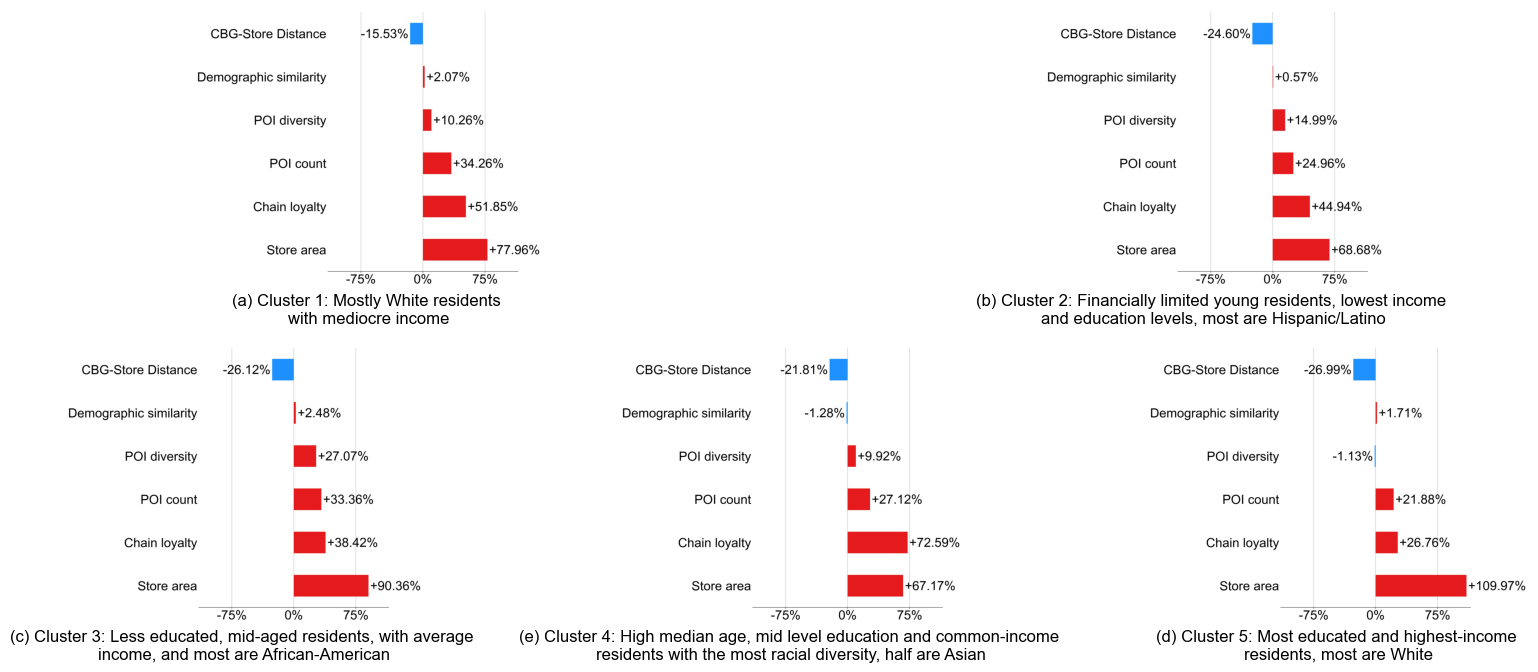

In [13]:
Image1 = Image.open(
    '2019_2020/Cluster 1 Parameter Value Changes from 2019 to 2020.jpg')
Image2 = Image.open(
    '2019_2020/Cluster 2 Parameter Value Changes from 2019 to 2020.jpg')
Image3 = Image.open(
    '2019_2020/Cluster 3 Parameter Value Changes from 2019 to 2020.jpg')
Image4 = Image.open(
    '2019_2020/Cluster 4 Parameter Value Changes from 2019 to 2020.jpg')
Image5 = Image.open(
    '2019_2020/Cluster 5 Parameter Value Changes from 2019 to 2020.jpg')
fig = plt.figure(figsize=(20, 8))

# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("(a) Cluster 1: Mostly White residents \nwith mediocre income", y=-0.15)
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("(b) Cluster 2: Financially limited young residents, lowest income \nand education levels, most are Hispanic/Latino", y=-0.15)
  
# Adds a subplot at the 3rd position
fig.add_subplot(2, 3, 4)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("(c) Cluster 3: Less educated, mid-aged residents, with average \nincome, and most are African-American", y=-0.15)
  
# Adds a subplot at the 4th position
fig.add_subplot(2, 3, 5)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("(e) Cluster 4: High median age, mid level education and common-income \nresidents with the most racial diversity, half are Asian", y=-0.15)

# # Adds a subplot at the 5th position
fig.add_subplot(2, 3, 6)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("(d) Cluster 5: Most educated and highest-income \nresidents, most are White", y=-0.15)

plt.savefig(
        'kmeans_cluster_param_change_combination_2020.jpg', 
                dpi=300, bbox_inches='tight')
plt.show()

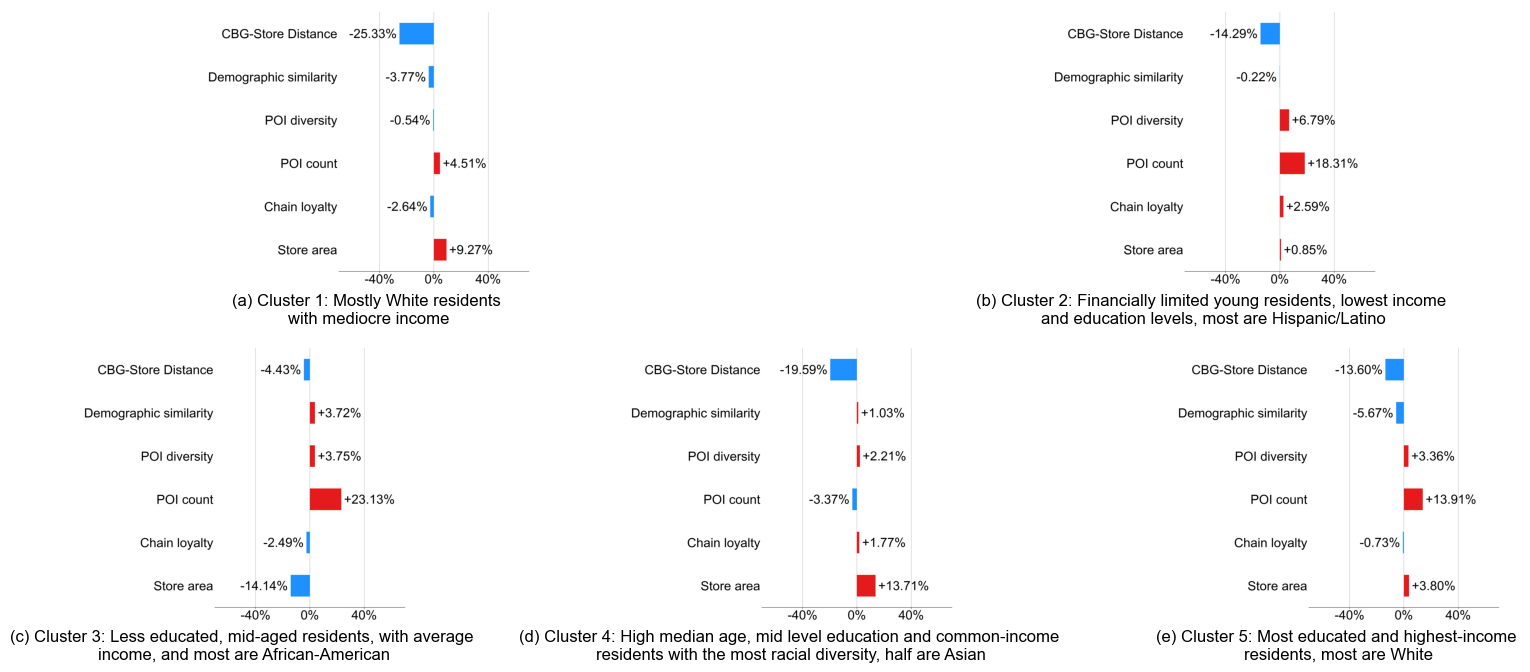

In [14]:
Image1 = Image.open(
    '2020_2021/Cluster 1 Parameter Value Changes from 2020 to 2021.jpg')
Image2 = Image.open(
    '2020_2021/Cluster 2 Parameter Value Changes from 2020 to 2021.jpg')
Image3 = Image.open(
    '2020_2021/Cluster 3 Parameter Value Changes from 2020 to 2021.jpg')
Image4 = Image.open(
    '2020_2021/Cluster 4 Parameter Value Changes from 2020 to 2021.jpg')
Image5 = Image.open(
    '2020_2021/Cluster 5 Parameter Value Changes from 2020 to 2021.jpg')
fig = plt.figure(figsize=(20, 8))

# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("(a) Cluster 1: Mostly White residents \nwith mediocre income", y=-0.15)
  
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("(b) Cluster 2: Financially limited young residents, lowest income \nand education levels, most are Hispanic/Latino", y=-0.15)
  
# Adds a subplot at the 3rd position
fig.add_subplot(2, 3, 4)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("(c) Cluster 3: Less educated, mid-aged residents, with average \nincome, and most are African-American", y=-0.15)
  
# Adds a subplot at the 4th position
fig.add_subplot(2, 3, 5)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("(d) Cluster 4: High median age, mid level education and common-income \nresidents with the most racial diversity, half are Asian", y=-0.15)

# # Adds a subplot at the 5th position
fig.add_subplot(2, 3, 6)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("(e) Cluster 5: Most educated and highest-income \nresidents, most are White", y=-0.15)

plt.savefig(
        'kmeans_cluster_param_change_combination_2021.jpg', 
                dpi=300, bbox_inches='tight')
plt.show()

In [15]:
cluster_centers = pd.read_csv(
    'data/4_analysis/cluster_centers.csv')

In [16]:
cluster_centers_updated = cluster_centers.copy()
cluster_centers_updated

,med_ageE,bachelor_d,med_hh_inc,whiteE,blackE,asianE,hispanicE
0,39.8885,0.311493,72968.9,0.720027,0.056442,0.119137,0.194471
1,33.5663,0.116630,41312.8,0.259816,0.246906,0.058375,0.643687
2,37.6620,0.188149,60493.0,0.111966,0.748685,0.034520,0.143862
3,41.0485,0.226296,63186.9,0.293688,0.052080,0.509465,0.188167
4,41.3561,0.636462,140215.0,0.794672,0.038620,0.106479,0.094551


In [17]:
def process_a_col(col_name, value_here):
    percentile_here = str(round(percentileofscore(clusters[col_name], value_here),1))+'\%'
    if col_name == 'med_hh_inc':
        return '\$'+str(round(value_here,3)) + ' (' + percentile_here + ')'
    return str(round(value_here,3)) + ' (' + percentile_here + ')'
process_a_col('med_ageE', 39.885)

'39.885 (62.9\\%)'

In [18]:
cluster_cols = cluster_centers_updated.columns
cluster_cols

Index(['med_ageE', 'bachelor_d', 'med_hh_inc', 'whiteE', 'blackE', 'asianE',
       'hispanicE'],
      dtype='object')

In [19]:
for c in cluster_cols:
    print(c)
    cluster_centers_updated[c] = cluster_centers_updated[c].apply(
        lambda x: process_a_col(c, x))

med_ageE
bachelor_d
med_hh_inc
whiteE
blackE
asianE
hispanicE


In [20]:
cluster_centers_updated = cluster_centers_updated.T.reset_index()
cluster_centers_updated

,index,0,1,2,3,4
0,med_ageE,39.889 (62.9\%),33.566 (29.8\%),37.662 (52.4\%),41.048 (68.5\%),41.356 (69.5\%)
1,bachelor_d,0.311 (69.6\%),0.117 (22.3\%),0.188 (43.4\%),0.226 (53.3\%),0.636 (93.4\%)
2,med_hh_inc,\$72968.9 (61.9\%),\$41312.8 (22.4\%),\$60493.0 (46.8\%),\$63186.9 (50.3\%),\$140215.0 (94.6\%)
3,whiteE,0.72 (77.1\%),0.26 (39.0\%),0.112 (20.4\%),0.294 (42.3\%),0.795 (83.7\%)
4,blackE,0.056 (43.6\%),0.247 (64.6\%),0.749 (88.6\%),0.052 (42.5\%),0.039 (38.2\%)
5,asianE,0.119 (63.2\%),0.058 (48.1\%),0.035 (37.8\%),0.509 (93.8\%),0.106 (60.7\%)
6,hispanicE,0.194 (49.9\%),0.644 (87.7\%),0.144 (40.8\%),0.188 (48.9\%),0.095 (29.0\%)


In [24]:
print('Table 4: K-means Cluster Centers by Socioeconomic Factors in NYC\n')
for indx, cont in cluster_centers_updated.iterrows():
    values = [cont[0], cont[1], cont[2], cont[3], cont[4]]
    values = ['\\textcolor{red}{'+v+'}' for v in values]
    print(cont['index'] + ': ' + ' & '.join(values))
    print('\n')

Table 4: K-means Cluster Centers by Socioeconomic Factors in NYC

med_ageE: \textcolor{red}{39.889 (62.9\%)} & \textcolor{red}{33.566 (29.8\%)} & \textcolor{red}{37.662 (52.4\%)} & \textcolor{red}{41.048 (68.5\%)} & \textcolor{red}{41.356 (69.5\%)}


bachelor_d: \textcolor{red}{0.311 (69.6\%)} & \textcolor{red}{0.117 (22.3\%)} & \textcolor{red}{0.188 (43.4\%)} & \textcolor{red}{0.226 (53.3\%)} & \textcolor{red}{0.636 (93.4\%)}


med_hh_inc: \textcolor{red}{\$72968.9 (61.9\%)} & \textcolor{red}{\$41312.8 (22.4\%)} & \textcolor{red}{\$60493.0 (46.8\%)} & \textcolor{red}{\$63186.9 (50.3\%)} & \textcolor{red}{\$140215.0 (94.6\%)}


whiteE: \textcolor{red}{0.72 (77.1\%)} & \textcolor{red}{0.26 (39.0\%)} & \textcolor{red}{0.112 (20.4\%)} & \textcolor{red}{0.294 (42.3\%)} & \textcolor{red}{0.795 (83.7\%)}


blackE: \textcolor{red}{0.056 (43.6\%)} & \textcolor{red}{0.247 (64.6\%)} & \textcolor{red}{0.749 (88.6\%)} & \textcolor{red}{0.052 (42.5\%)} & \textcolor{red}{0.039 (38.2\%)}


asianE: \t